In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
import os

In [38]:
#changing the dir
os.chdir('/content/gdrive/MyDrive/Lung_disease')

In [39]:
#Importing the libraries
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from glob import glob
import numpy as np

In [40]:
#defining the image shape as vgg accept only 224,224

IMAGE_SIZE = [224,224]


In [41]:
#Instatiating the vgg16 class object
vgg16 = VGG16(input_shape= IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [42]:
#Dont want to train existing vgg16 layers so
for layer in vgg16.layers:
  layer.trainable = False

In [43]:
#Flattening the vgg16 output 
x = Flatten()(vgg16.output)

In [44]:
#finding the number of classes from train set 
folders = glob('Dataset/train/*')

In [45]:
print("The classes are {}".format(folders))

The classes are ['Dataset/train/NORMAL', 'Dataset/train/PNEUMONIA']


In [46]:
#defining the Dense output layer as 2 classes using softmax
prediction = Dense(len(folders),activation='softmax')(x)

In [47]:
#Including the out as Dense layer in the existing vgg16 architecture
model = Model(inputs = vgg16.input, outputs = prediction)

In [48]:
#checking the model architecture
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [49]:
#Compiling the model by adding loss function, metrics 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [50]:
#With the help of Image Augmentation loading the image 
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)


In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [52]:
#Loading the images with the help of train_datagen and test_datagen
train_set = train_datagen.flow_from_directory('Dataset/train',target_size=(224,224),class_mode='categorical',batch_size=32)

Found 5216 images belonging to 2 classes.


In [53]:
#loading the test set from test datagen which in it applies rescaling 
test_set = test_datagen.flow_from_directory('Dataset/test',target_size=(224,224),class_mode='categorical',batch_size=32)

Found 624 images belonging to 2 classes.


In [54]:
#finding the class 
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [55]:
#Above indicate that 0 - Normal
# 1 - Pneumonia

In [56]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
163/163 [==============================] - 145s 884ms/step - loss: 0.2415 - accuracy: 0.9049 - val_loss: 0.2748 - val_accuracy: 0.9006
Epoch 2/15
163/163 [==============================] - 140s 857ms/step - loss: 0.1481 - accuracy: 0.9444 - val_loss: 0.4235 - val_accuracy: 0.8782
Epoch 3/15
163/163 [==============================] - 139s 852ms/step - loss: 0.1142 - accuracy: 0.9599 - val_loss: 0.2862 - val_accuracy: 0.9103
Epoch 4/15
163/163 [==============================] - 139s 853ms/step - loss: 0.1251 - accuracy: 0.9521 - val_loss: 0.3054 - val_accuracy: 0.9103
Epoch 5/15
163/163 [==============================] - 139s 853ms/step - loss: 0.1028 - accuracy: 0.9617 - val_loss: 0.3243 - val_accuracy: 0.9006
Epoch 6/15
163/163 [==============================] - 138s 845ms/step - loss: 0.0964 - accuracy: 0.9643 - val_loss: 0.2843 - val_accuracy: 0.9022
Epoch 7/15
163/163 [==============================] - 142s 870ms/step - loss: 0.1024 - accuracy: 0.9617 - val_loss: 0.3375 -

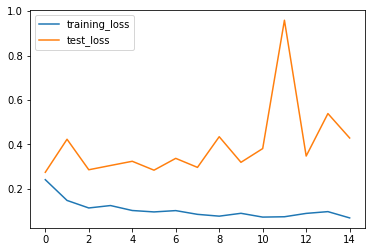

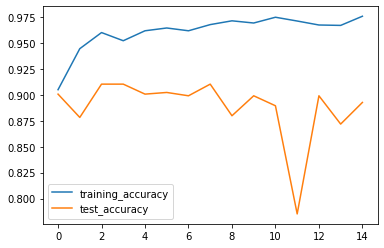

<Figure size 432x288 with 0 Axes>

In [57]:
#Plotting the loss and accuracy 
import matplotlib.pyplot as plt
plt.plot(r.history["loss"],label='training_loss')
plt.plot(r.history["val_loss"],label = 'test_loss')
plt.legend()
plt.show()
plt.savefig("Loss_plot")

plt.plot(r.history['accuracy'],label = 'training_accuracy')
plt.plot(r.history["val_accuracy"],label = 'test_accuracy')
plt.legend()
plt.show()
plt.savefig("Accuracy_plot")



In [58]:
y_pred = model.predict(test_set)

In [60]:
import numpy as np
y_pred  = np.argmax(y_pred,axis=1)

In [61]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [62]:
model.save('Lung_disease_v166.h5')

In [63]:
from tensorflow.keras.models import load_model


In [64]:
#Loading the saved model
saved_model = load_model('Lung_disease_v166.h5')

In [73]:
#Loading the image that want to test 
img = image.load_img('Dataset/test/PNEUMONIA/person100_bacteria_479.jpeg',target_size=(224,224))
x = image.img_to_array(img)

In [74]:
x.shape

(224, 224, 3)

In [75]:
#Normalizing the  image 
x=x/255

In [76]:
#applying the preprocess input to the data 
x = np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [77]:
#predicting with use of saved model 
pred = saved_model.predict(img_data)

In [78]:
#applying argmax to convert the probability into class
result = np.argmax(pred,axis=1)

In [81]:
#checking the result
result

array([1])

In [82]:
#Printing the status of person 
if result==1:
  print("Person is having Pneumonia")
else:
  print("Person is normal")

Person is having Pneumonia
